- Detecção de Comunidades: Identificar grupos ou comunidades dentro de redes.
- Grafos Bipartidos: Trabalhar com redes que envolvem dois tipos distintos de nós.
- Análise de Centralidade Avançada: Explorar métricas mais profundas para entender a importância dos nós.
- Importação/Exportação de Grafos: Carregar e salvar grafos em formatos diferentes.

### Etapas
- Detecção de Comunidades: Aplicamos o algoritmo de Girvan-Newman para identificar divisões naturais na rede, que pode ser crucial para entender a estrutura social ou organizacional dentro da rede.
- Grafos Bipartidos: Demonstramos como criar e validar um grafo bipartido, que é útil para situações em que existem dois tipos distintos de entidades.
- Análise de Centralidade Avançada: Calculamos centralidades de intermediação e de vetor próprio, que ajudam a identificar os nós mais influentes na rede.
- Importação/Exportação de Grafos: Mostramos como salvar e carregar grafos, permitindo a persistência de dados de rede e facilitando a colaboração e análise contínua.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd

In [2]:
# Criação de um grafo simples para demonstração
G = nx.karate_club_graph()

In [3]:
# 1. Detecção de Comunidades
# Utilizando o algoritmo de Girvan-Newman para identificação de comunidades
communities = community.girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))
print("Comunidades detectadas:", sorted_communities)

Comunidades detectadas: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


In [4]:
# 2. Grafos Bipartidos
# Criando um grafo bipartido
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D'], bipartite=0)  # Adiciona um conjunto de nós
B.add_nodes_from([1, 2, 3, 4], bipartite=1)  # Adiciona outro conjunto de nós
B.add_edges_from([('A', 2), ('B', 3), ('C', 3), ('D', 4)])


# Verificando se o grafo é bipartido
print("É bipartido:", bipartite.is_bipartite(B))

É bipartido: True


In [5]:
# 3. Análise de Centralidade Avançada
# Centralidade de intermediação
betweenness_centrality = nx.betweenness_centrality(G)
print("Centralidade de intermediação:", betweenness_centrality)

Centralidade de intermediação: {0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


In [6]:
# Centralidade de vetor próprio
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Centralidade de vetor próprio:", eigenvector_centrality)

Centralidade de vetor próprio: {0: 0.35548349418519426, 1: 0.2659538704545024, 2: 0.3171893899684447, 3: 0.21117407832057056, 4: 0.0759664588165738, 5: 0.07948057788594245, 6: 0.07948057788594245, 7: 0.1709551149803543, 8: 0.22740509147166046, 9: 0.10267519030637756, 10: 0.0759664588165738, 11: 0.05285416945233646, 12: 0.08425192086558085, 13: 0.22646969838808145, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.02363479426059687, 17: 0.0923967566684595, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.0923967566684595, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.057053735638028055, 25: 0.0592082025027901, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493088, 31: 0.191036269797917, 32: 0.3086510477336959, 33: 0.37337121301323506}


In [7]:
# 4. Importação/Exportação de Grafos
# Salvando o grafo em formato adjlist
nx.write_adjlist(G, "karate_club.adjlist")

# Carregando o grafo
H = nx.read_adjlist("karate_club.adjlist")
print("Nós do grafo carregado:", H.nodes())

Nós do grafo carregado: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '17', '19', '21', '31', '30', '9', '27', '28', '32', '16', '33', '14', '15', '18', '20', '22', '23', '25', '29', '24', '26']


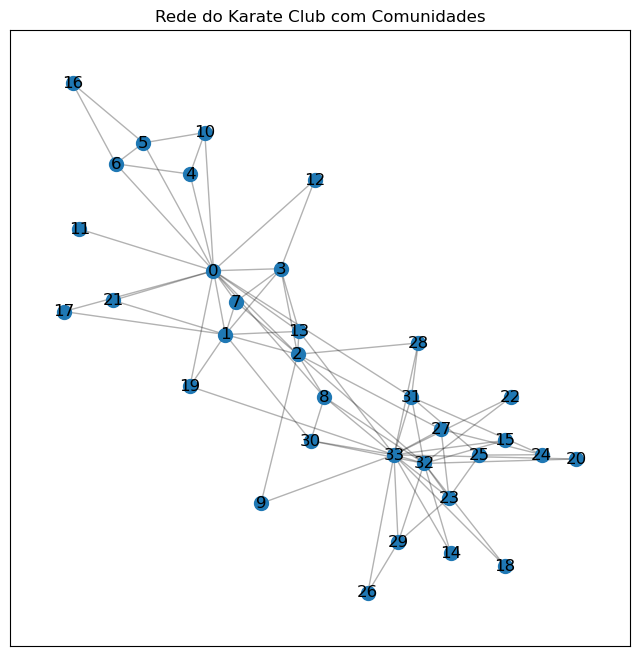

In [8]:
# Visualização da rede com comunidades destacadas
pos = nx.spring_layout(G)  # Layout dos nós
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.3)
for community in sorted_communities:
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=100)
nx.draw_networkx_labels(G, pos)
plt.title("Rede do Karate Club com Comunidades")
plt.show()
